## Import Library

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import nltk.stem as stemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to C:\Users\Reza
[nltk_data]     Fakhrurrozi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Reza
[nltk_data]     Fakhrurrozi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Load the Dataset

In [2]:
df_data = pd.read_csv("data.csv", encoding="cp1252")
df_kamusalay = pd.read_csv('new_kamusalay.csv', encoding="cp1252", header=None)
df_kamusalay = df_kamusalay.rename(columns={0: 'alay', 1: 'normal'})
df_abusive = pd.read_csv('abusive.csv', encoding="cp1252")

In [3]:
df_data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [5]:
df_data.shape

(13169, 13)

## Cek Duplikat Data

In [6]:
#Total data yang duplikat sebanyak 125
df_data.duplicated().sum()

125

In [7]:
#Menghilangkan data yang duplikat
df_data = df_data.drop_duplicates()

In [8]:
#Mengecek kembali data yang duplikat, hasilnya sudah 0
df_data.duplicated().sum()

0

In [9]:
df_data.shape

(13044, 13)

## Missing Value

In [10]:
df_data.isnull()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,False,False,False,False,False,False,False,False,False,False,False,False,False
13165,False,False,False,False,False,False,False,False,False,False,False,False,False
13166,False,False,False,False,False,False,False,False,False,False,False,False,False
13167,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df_data.isnull().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

## Function Cleaning

In [12]:
#cleaning data tweet
def clean_text(text):
    #menghapus username twitter
    text = re.sub('@[^\s]+', ' ', text)
    #menghapus https dan http
    text = re.sub(r'(?:\@|http?\://|https?\://|www)\S+', '', text)
    #mengganti karakter html dengan tanda petik
    text = re.sub('<.*?>', ' ', text)
    #mempertimbangkan huruf dan nama
    text = re.sub('[^a-zA-Z]', ' ', text)
    #mengganti line baru dengan spasi
    text = re.sub('\n', ' ', text)
    #mengubah ke huruf kecil
    text = text.lower()
    #menghapus single char
    text = re.sub(r'\b[a-zA-Z]\b', ' ', text)
    #memisahkan dan menggabungkan kata
    text = ' '.join(text.split())
    #menghapus link picture
    text = re.sub(r'pic.twitter.com.[\w]+', '', text)
    #menghapus username
    text = re.sub('user',' ', text)
    #menghapus RT simbol
    text = re.sub('RT',' ',text)
    return text

# Exploratory Data Analysis (EDA)

In [13]:
#Membuat kolom baru untuk Tweet After Cleansing
df_data['Text Tweet After Cleansing'] = df_data['Tweet'].apply(clean_text)

subset = df_data[["Tweet", "HS", "Abusive", "Text Tweet After Cleansing"]]
subset.head(10)

,Tweet,HS,Abusive,Text Tweet After Cleansing
0,- disaat semua cowok berusaha melacak perhatia...,1,1,disaat semua cowok berusaha melacak perhatian ...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,rt siapa yang telat ngasih tau elu edan sa...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,kadang aku berfikir kenapa aku tetap percaya p...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,aku itu aku nku tau matamu sipit tapi dili...
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,kaum cebong kapir udah keliatan dongoknya ...
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,1,1,ya bani taplak dkk xf xf xf
6,deklarasi pilkada 2018 aman dan anti hoax warg...,0,0,deklarasi pilkada aman dan anti hoax warga duk...
7,Gue baru aja kelar re-watch Aldnoah Zero!!! pa...,0,1,gue baru aja kelar re watch aldnoah zero palin...
8,Nah admin belanja satu lagi port terbaik nak m...,0,0,nah admin belanja satu lagi port terbaik nak m...
9,USER Enak lg klo smbil ngewe',0,1,enak lg klo smbil ngewe


In [14]:
#melakukan kembali cleansing
#tokenizing -> memecah aliran teks menjadi per kata
def word_tokenize_wrapper(text):
    return word_tokenize(text)

df_data['Text_Token'] = df_data['Text Tweet After Cleansing'].apply(word_tokenize_wrapper)

subset = df_data[["Text Tweet After Cleansing", "Text_Token"]]
subset.head(10)

,Text Tweet After Cleansing,Text_Token
0,disaat semua cowok berusaha melacak perhatian ...,"[disaat, semua, cowok, berusaha, melacak, perh..."
1,rt siapa yang telat ngasih tau elu edan sa...,"[rt, siapa, yang, telat, ngasih, tau, elu, eda..."
2,kadang aku berfikir kenapa aku tetap percaya p...,"[kadang, aku, berfikir, kenapa, aku, tetap, pe..."
3,aku itu aku nku tau matamu sipit tapi dili...,"[aku, itu, aku, nku, tau, matamu, sipit, tapi,..."
4,kaum cebong kapir udah keliatan dongoknya ...,"[kaum, cebong, kapir, udah, keliatan, dongokny..."
5,ya bani taplak dkk xf xf xf,"[ya, bani, taplak, dkk, xf, xf, xf]"
6,deklarasi pilkada aman dan anti hoax warga duk...,"[deklarasi, pilkada, aman, dan, anti, hoax, wa..."
7,gue baru aja kelar re watch aldnoah zero palin...,"[gue, baru, aja, kelar, re, watch, aldnoah, ze..."
8,nah admin belanja satu lagi port terbaik nak m...,"[nah, admin, belanja, satu, lagi, port, terbai..."
9,enak lg klo smbil ngewe,"[enak, lg, klo, smbil, ngewe]"


In [15]:
#menghilangkan kata-kata yang tidak penting
list_stopwords = stopwords.words('indonesian')
list_stopwords.extend(['yg', 'dg', 'rt', 'dgn', 'ny', 'd', 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'dkk', 'xf', 'nku', 'url',
                       'xa', 'xaa' 'xi', 'xe'])
#convert list ke dictionary
list_stopwords = set(list_stopwords)

#remove stopwords pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

df_data["Text_Remove_Stopwords"] = df_data["Text_Token"].apply(stopwords_removal)
df_data["Text_Remove_Stopwords"] = df_data["Text_Remove_Stopwords"].str.join(sep=" ")
print(df_data["Text_Remove_Stopwords"].head(10))

0    disaat cowok berusaha melacak perhatian gue lo...
1    telat ngasih elu edan sarap gue bergaul cigax ...
2    kadang berfikir percaya tuhan jatuh berkali ka...
3                                  matamu sipit diliat
4    kaum cebong kapir udah keliatan dongoknya dong...
5                                          bani taplak
6    deklarasi pilkada aman anti hoax warga dukuh s...
7    gue kelar re watch aldnoah zero kampret emang ...
8    admin belanja port terbaik nak makan ais kepal...
9                                  enak lg smbil ngewe
Name: Text_Remove_Stopwords, dtype: object


## Meng-import kata alay to normal untuk normalisasi 

In [16]:
df_kamusalay

,alay,normal
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali
...,...,...
15162,mendikbud,menteri pendidikan dan kebudayaan
15163,mendag,menteri perdagangan
15164,menaker,menteri tenaga kerja
15165,memetwit,mentwit


In [17]:
kamusalay = dict(zip(df_kamusalay['alay'], df_kamusalay['normal']))
def alay_to_normal(text):
    for word in kamusalay:
        return ' '.join([kamusalay[word] if word in kamusalay else word for word in text.split(' ')])

df_data['Tweet_Normalisasi_Alay'] = df_data['Text_Remove_Stopwords'].apply(alay_to_normal)

df_data['Tweet_Normalisasi_Alay'].head(10)

0    di saat cowok berusaha melacak perhatian gue k...
1    telat memberi kamu edan sarap gue bergaul ciga...
2    kadang berpikir percaya tuhan jatuh berkali ka...
3                                 matamu sipit dilihat
4    kaum cebong kafir sudah kelihatan dongoknya du...
5                                          bani taplak
6    deklarasi pilihan kepala daerah aman anti hoak...
7    gue selesai re watch aldnoah zero kampret mema...
8    admin belanja port terbaik nak makan ais kepal...
9                               enak lagi sambil ngewe
Name: Tweet_Normalisasi_Alay, dtype: object

In [18]:
subset = df_data[["Text Tweet After Cleansing", "Text_Token", "Text_Remove_Stopwords", "Tweet_Normalisasi_Alay"]]
subset.head(10)

,Text Tweet After Cleansing,Text_Token,Text_Remove_Stopwords,Tweet_Normalisasi_Alay
0,disaat semua cowok berusaha melacak perhatian ...,"[disaat, semua, cowok, berusaha, melacak, perh...",disaat cowok berusaha melacak perhatian gue lo...,di saat cowok berusaha melacak perhatian gue k...
1,rt siapa yang telat ngasih tau elu edan sa...,"[rt, siapa, yang, telat, ngasih, tau, elu, eda...",telat ngasih elu edan sarap gue bergaul cigax ...,telat memberi kamu edan sarap gue bergaul ciga...
2,kadang aku berfikir kenapa aku tetap percaya p...,"[kadang, aku, berfikir, kenapa, aku, tetap, pe...",kadang berfikir percaya tuhan jatuh berkali ka...,kadang berpikir percaya tuhan jatuh berkali ka...
3,aku itu aku nku tau matamu sipit tapi dili...,"[aku, itu, aku, nku, tau, matamu, sipit, tapi,...",matamu sipit diliat,matamu sipit dilihat
4,kaum cebong kapir udah keliatan dongoknya ...,"[kaum, cebong, kapir, udah, keliatan, dongokny...",kaum cebong kapir udah keliatan dongoknya dong...,kaum cebong kafir sudah kelihatan dongoknya du...
5,ya bani taplak dkk xf xf xf,"[ya, bani, taplak, dkk, xf, xf, xf]",bani taplak,bani taplak
6,deklarasi pilkada aman dan anti hoax warga duk...,"[deklarasi, pilkada, aman, dan, anti, hoax, wa...",deklarasi pilkada aman anti hoax warga dukuh s...,deklarasi pilihan kepala daerah aman anti hoak...
7,gue baru aja kelar re watch aldnoah zero palin...,"[gue, baru, aja, kelar, re, watch, aldnoah, ze...",gue kelar re watch aldnoah zero kampret emang ...,gue selesai re watch aldnoah zero kampret mema...
8,nah admin belanja satu lagi port terbaik nak m...,"[nah, admin, belanja, satu, lagi, port, terbai...",admin belanja port terbaik nak makan ais kepal...,admin belanja port terbaik nak makan ais kepal...
9,enak lg klo smbil ngewe,"[enak, lg, klo, smbil, ngewe]",enak lg smbil ngewe,enak lagi sambil ngewe


In [ ]:
#df_abusive = pd.read_csv('abusive.csv', encoding="cp1252")

#list_abusive = df_abusive['ABUSIVE'].str.lower().tolist()
#def normalize_abusive(text):
    #list_word = text.split()
    #return ' '.join([text for text in list_word if text not in list_abusive])

#df_data['Tweet_Normalisasi_Abusive'] = df_data['Tweet_Normalisasi_Alay'].apply(normalize_abusive)
#df_data['Tweet_Normalisasi_Abusive'].head(10)

In [ ]:
#subset = df_data[["Text Tweet After Cleansing", "Text_Token", "Text_Remove_Stopwords", "Tweet_Normalisasi_Alay", "Tweet_Normalisasi_Abusive"]]
#subset.head(10)

# Cek kembali duplikat data

## Menyortir kolom yang diperlukan

In [19]:
#Total data yang duplikat sebanyak 261
df_data = df_data[["Tweet_Normalisasi_Alay", "HS", "Abusive"]]
df_data.duplicated().sum()

261

In [20]:
##Menghapus data yang duplikat
df_data = df_data.drop_duplicates()

In [21]:
df_data.shape

(12783, 3)

## Memuat tweet yang berisi tentang Hate Speech dan Abusive

In [22]:
#Memisahkan label tweet
def tweet(text):
    if text['HS'] == 1 and text['Abusive'] == 1:
        return 'Hate Speech & Abusive'
    elif text['HS'] == 1 and text['Abusive'] == 0:
        return 'Hate Speech'
    elif text['HS'] == 0 and text['Abusive'] == 1:
        return 'Abusive'
    else:
        return 'Neutral'

In [23]:
df_data['label'] = df_data.apply(tweet, axis=1)

In [24]:
#Mengecek dataset
df_data.head(10)

,Tweet_Normalisasi_Alay,HS,Abusive,label
0,di saat cowok berusaha melacak perhatian gue k...,1,1,Hate Speech & Abusive
1,telat memberi kamu edan sarap gue bergaul ciga...,0,1,Abusive
2,kadang berpikir percaya tuhan jatuh berkali ka...,0,0,Neutral
3,matamu sipit dilihat,0,0,Neutral
4,kaum cebong kafir sudah kelihatan dongoknya du...,1,1,Hate Speech & Abusive
5,bani taplak,1,1,Hate Speech & Abusive
6,deklarasi pilihan kepala daerah aman anti hoak...,0,0,Neutral
7,gue selesai re watch aldnoah zero kampret mema...,0,1,Abusive
8,admin belanja port terbaik nak makan ais kepal...,0,0,Neutral
9,enak lagi sambil ngewe,0,1,Abusive


In [25]:
#Menghitung jumlah klasifikasi tweet berdasarkan label
df_data['label'].value_counts()

label
Neutral                  5684
Hate Speech & Abusive    3174
Hate Speech              2225
Abusive                  1700
Name: count, dtype: int64

<Axes: ylabel='label'>

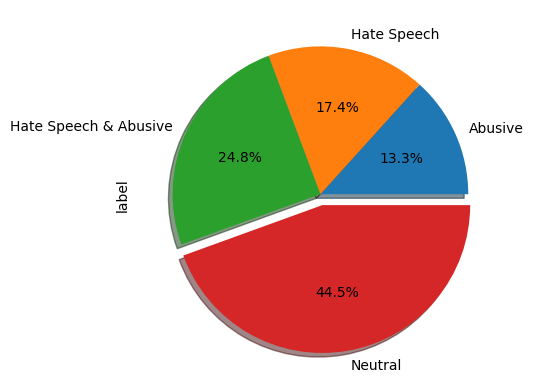

In [27]:
#Data Visualisasi
explode = [0, 0, 0, 0.075]
presentase_sentiment = df_data.groupby("label").label.count()
presentase_sentiment.plot(kind = 'pie', autopct = '%1.1f%%', explode = explode, shadow = True)

In [28]:
#Membuat Kolom Baru Total Char
df_data['Total_Char'] = df_data['Tweet_Normalisasi_Alay'].apply(len)
df_data.head()

,Tweet_Normalisasi_Alay,HS,Abusive,label,Total_Char
0,di saat cowok berusaha melacak perhatian gue k...,1,1,Hate Speech & Abusive,119
1,telat memberi kamu edan sarap gue bergaul ciga...,0,1,Abusive,69
2,kadang berpikir percaya tuhan jatuh berkali ka...,0,0,Neutral,138
3,matamu sipit dilihat,0,0,Neutral,20
4,kaum cebong kafir sudah kelihatan dongoknya du...,1,1,Hate Speech & Abusive,54


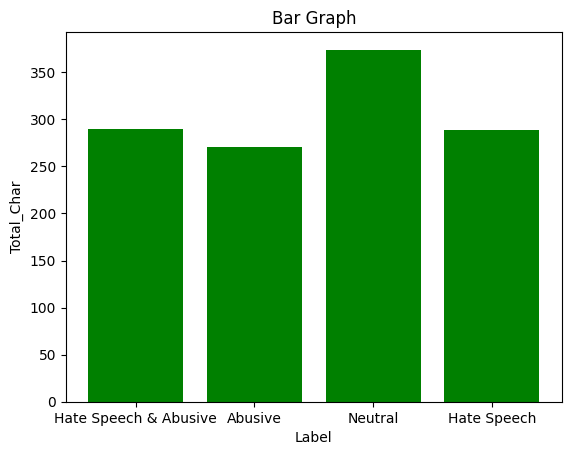

In [29]:
#Data Visualisasi
divisions = df_data["label"]
division_average_marks = df_data["Total_Char"] 

plt.bar(divisions, division_average_marks, color='green')
plt.title("Bar Graph") 
plt.xlabel("Label")
plt.ylabel("Total_Char")

plt.show()

In [31]:
#Membuat Kolom Baru Total Word
df_data["Total_Word"] = df_data['Tweet_Normalisasi_Alay'].apply(lambda x: len(x.split()))
df_data.head()

,Tweet_Normalisasi_Alay,HS,Abusive,label,Total_Char,Total_Word
0,di saat cowok berusaha melacak perhatian gue k...,1,1,Hate Speech & Abusive,119,19
1,telat memberi kamu edan sarap gue bergaul ciga...,0,1,Abusive,69,12
2,kadang berpikir percaya tuhan jatuh berkali ka...,0,0,Neutral,138,19
3,matamu sipit dilihat,0,0,Neutral,20,3
4,kaum cebong kafir sudah kelihatan dongoknya du...,1,1,Hate Speech & Abusive,54,8


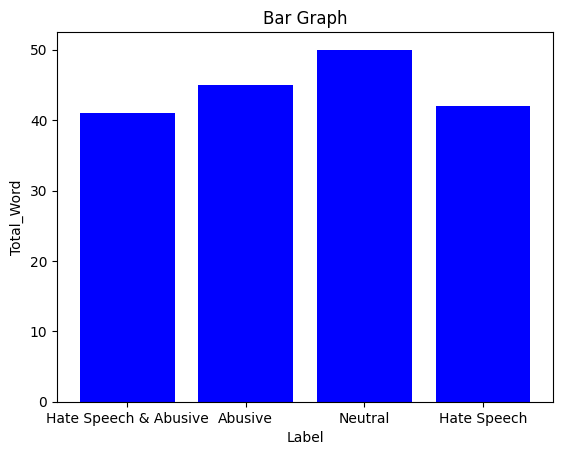

In [32]:
#Data Visualisasi
divisions = df_data["label"]
division_average_marks = df_data["Total_Word"] 

plt.bar(divisions, division_average_marks, color='blue')
plt.title("Bar Graph") 
plt.xlabel("Label")
plt.ylabel("Total_Word")

plt.show()

# Univariate

## Measures of central tendency 

## Mean

In [38]:
# Rata-rata setiap kolom yang berisi numerik
df_data[["Total_Char", "Total_Word"]].mean()

Total_Char    79.599155
Total_Word    11.504889
dtype: float64

In [39]:
# Rata-rata kolom total_word dan total_char, group by label
avg_char_word_per_category = df_data.groupby("label").agg({"Total_Word":["mean"], "Total_Char":["mean"]}).reset_index()
avg_char_word_per_category

,label,Total_Word,Total_Char
,,mean,mean
0,Abusive,8.648824,54.336471
1,Hate Speech,10.890787,78.947865
2,Hate Speech & Abusive,10.533396,69.965028
3,Neutral,13.141977,92.789585


In [37]:
df_data[["Total_Char", "Total_Word"]].describe()

,Total_Char,Total_Word
count,12783.000000,12783.000000
mean,79.599155,11.504889
std,52.882147,7.331284
min,0.000000,0.000000
25%,38.000000,6.000000
50%,68.000000,10.000000
75%,110.000000,16.000000
max,374.000000,50.000000


## Median

In [40]:
# Median setiap kolom yang berisi numerik
df_data[["Total_Char", "Total_Word"]].median()

Total_Char    68.0
Total_Word    10.0
dtype: float64

In [41]:
# Median kolom total_word dan total_char, group by label
median_char_word_per_category = df_data.groupby("label").agg({"Total_Word":["median"], "Total_Char":["median"]}).reset_index()
median_char_word_per_category

,label,Total_Word,Total_Char
,,median,median
0,Abusive,7.0,41.0
1,Hate Speech,10.0,71.0
2,Hate Speech & Abusive,9.0,59.0
3,Neutral,12.0,82.0


## Mode

In [42]:
# Modus setiap kolom yang berisi numerik
df_data[["Total_Char", "Total_Word"]].mode()

,Total_Char,Total_Word
0,27,4


In [44]:
mode_char_word_per_category = df_data.groupby("label").agg({"Total_Word":pd.Series.mode}).reset_index()
mode_char_word_per_category

,label,Total_Word
0,Abusive,3
1,Hate Speech,9
2,Hate Speech & Abusive,4
3,Neutral,8


## Measures of spread

## Range

In [45]:
range_total_word = df_data.Total_Word.max() - df_data.Total_Word.min()
range_total_word

50

In [46]:
range_total_char = df_data.Total_Char.max() - df_data.Total_Char.min()
range_total_char

374

## Quartile dan Interquartile Total Char

In [47]:
#Cari nilai minimum
p0 = df_data.Total_Char.min()
p0

0

In [48]:
#Cari nilai maksimum
p100 = df_data.Total_Char.max()
p100

374

In [49]:
# Cari quartile range 1
q1 = df_data.Total_Char.quantile(0.25)
q1

38.0

In [50]:
#Cari quartile range 2
q2 = df_data.Total_Char.quantile(0.5)
q2

68.0

In [51]:
#Cari quartile range 3
q3 = df_data.Total_Char.quantile(0.75)
q3

110.0

In [52]:
#Cari interquartile range (IQR)
iqr = q3-q1
iqr

72.0

In [53]:
#Cari batas bawah
lower_limit = q1-1.5*iqr
lower_limit

-70.0

In [54]:
#Cari batas atas
upper_limit = q3+1.5*iqr
upper_limit

218.0

In [61]:
#Batas bawah, nilai minimum, dan outlier Total Char
print("Batas bawah 'Total_Char': ", lower_limit)
print("Nilai minimum: ", p0)

if(lower_limit < p0):
  print("Tidak ada outlier dari sisi batas bawah")
else:
  print("Ada outlier dari sisi batas bawah")

Batas bawah 'Total_Char':  -70.0
Nilai minimum:  0
Tidak ada outlier dari sisi batas bawah


In [62]:
#Batas atas, nilai maksimum, dan outlier Total Char
print("Batas atas 'Total_Char': ", upper_limit)
print("Nilai maksimum: ", p100)

if(upper_limit > p100 ):
  print("Tidak ada outlier dari sisi batas atas")
else:
  print("Ada outlier dari sisi batas atas")

Batas atas 'Total_Char':  218.0
Nilai maksimum:  374
Ada outlier dari sisi batas atas


## Quartile dan Interquartile Total Word

In [65]:
#Cari nilai minimum
p0 = df_data.Total_Word.min()

#Cari nilai maksimum
p100 = df_data.Total_Word.max()

#Cari quartile range 1
q1 = df_data.Total_Word.quantile(0.25)

#Cari quartile range 2
q2 = df_data.Total_Word.quantile(0.5)

#Cari quartile range 3
q3 = df_data.Total_Word.quantile(0.75)

#Cari interquartile range (IQR)
iqr = q3-q1

#Cari batas bawah
lower_limit = q1-1.5*iqr

#Cari batas atas
upper_limit = q3+1.5*iqr

In [66]:
#Batas bawah, nilai minimum, dan outlier Total Word
print("Batas bawah 'total_word': ", lower_limit)
print("Nilai minimum: ", p0)

if(lower_limit < p0):
  print("Tidak ada outlier dari sisi batas bawah")
else:
  print("Ada outlier dari sisi batas bawah")

Batas bawah 'total_word':  -9.0
Nilai minimum:  0
Tidak ada outlier dari sisi batas bawah


In [67]:
#Batas atas, nilai maksimum, dan outlier Total Word
print("Batas atas 'total_word': ", upper_limit)
print("Nilai maksimum: ", p100)

if(upper_limit > p100):
  print("Tidak ada outlier dari sisi batas atas")
else:
  print("Ada outlier dari sisi batas atas")

Batas atas 'total_word':  31.0
Nilai maksimum:  50
Ada outlier dari sisi batas atas


# Variance

In [68]:
#Menghitung variance dari seluruh kolom numerik
df_data[["Total_Char", "Total_Word"]].var()

Total_Char    2796.521520
Total_Word      53.747727
dtype: float64

# Standard Deviation

In [70]:
#Menghitung standar deviasi dari seluruh kolom numerik
df_data[["Total_Char", "Total_Word"]].std()

Total_Char    52.882147
Total_Word     7.331284
dtype: float64

# Skewness

In [71]:
#Menghitung skewness (ketidaksimetrisan) dari seluruh kolom numerik
df_data[["Total_Char", "Total_Word"]].skew()

Total_Char    0.980974
Total_Word    0.999617
dtype: float64

# Kurtosis

In [72]:
#Menghitung kurtosis (derajat keruncingan) dari seluruh kolom numerik
df_data[["Total_Char", "Total_Word"]].kurtosis()

Total_Char    0.776024
Total_Word    0.822742
dtype: float64

<Axes: >

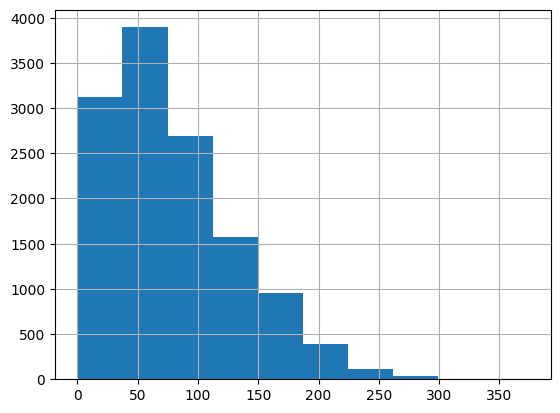

In [74]:
#Histogram total char
df_data.Total_Char.hist()

<Axes: xlabel='Total_Char', ylabel='Density'>

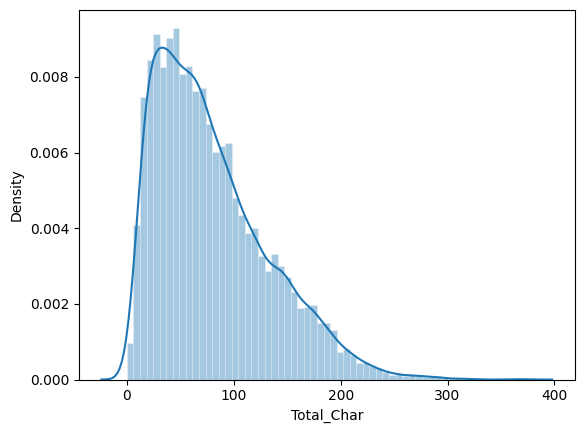

In [75]:
sns.histplot(
    df_data["Total_Char"], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4)
)

<Axes: >

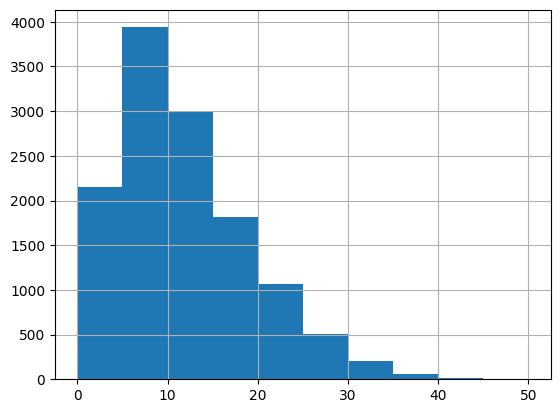

In [76]:
#Histogram total word
df_data.Total_Word.hist()

<Axes: xlabel='Total_Word', ylabel='Density'>

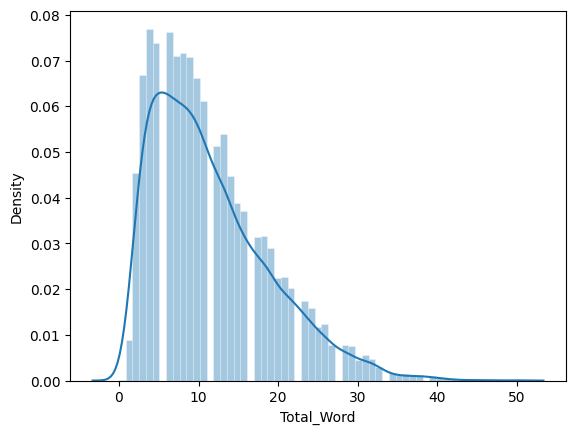

In [77]:
sns.histplot(
    df_data["Total_Word"], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4)
)

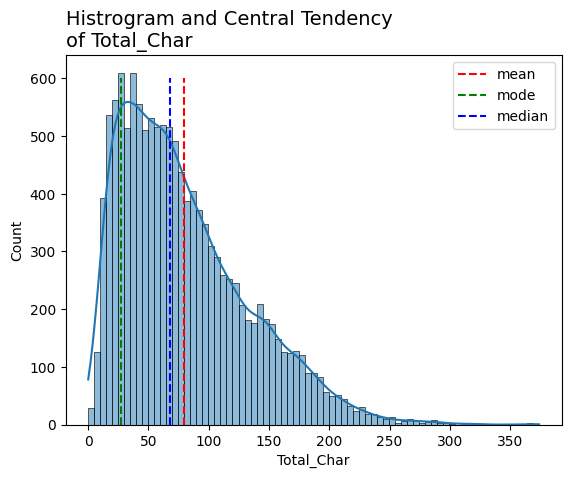

In [78]:
sns.histplot(data=df_data, x='Total_Char', binwidth=5, kde=True)
plt.vlines(df_data['Total_Char'].mean(), 0, 600, label='mean', linestyles='dashed', color='red')
plt.vlines(df_data['Total_Char'].mode(), 0, 600, label='mode', linestyles='dashed', color='green')
plt.vlines(df_data['Total_Char'].median(), 0, 600, label='median', linestyles='dashed', color='blue')
plt.legend()
plt.title("Histrogram and Central Tendency\nof Total_Char", loc="left", fontsize=14)
plt.show()

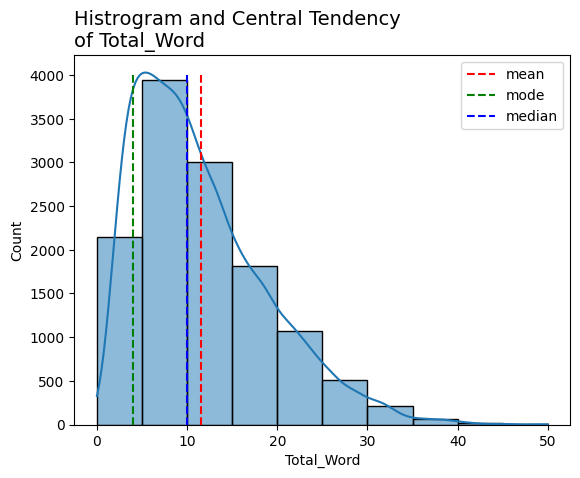

In [79]:
sns.histplot(data=df_data, x='Total_Word', binwidth=5, kde=True)
plt.vlines(df_data['Total_Word'].mean(), 0, 4000, label='mean', linestyles='dashed', color='red')
plt.vlines(df_data['Total_Word'].mode(), 0, 4000, label='mode', linestyles='dashed', color='green')
plt.vlines(df_data['Total_Word'].median(), 0, 4000, label='median', linestyles='dashed', color='blue')
plt.legend()
plt.title("Histrogram and Central Tendency\nof Total_Word", loc="left", fontsize=14)
plt.show()

## Wordcloud

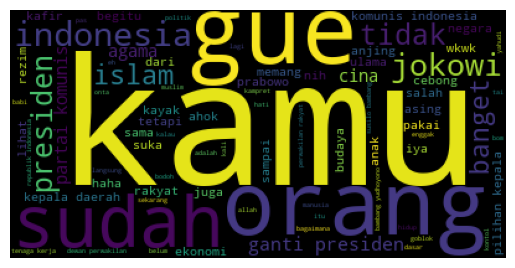

In [80]:
text = ' '.join(df_data['Tweet_Normalisasi_Alay'])
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

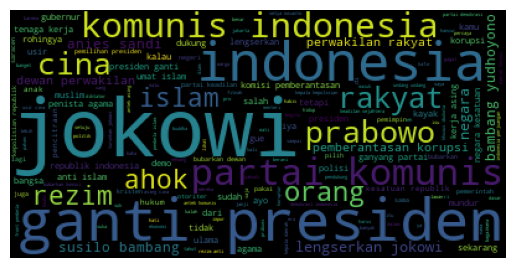

In [81]:
text = ' '.join(df_data['Tweet_Normalisasi_Alay'][df_data.label=="Hate Speech"])
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

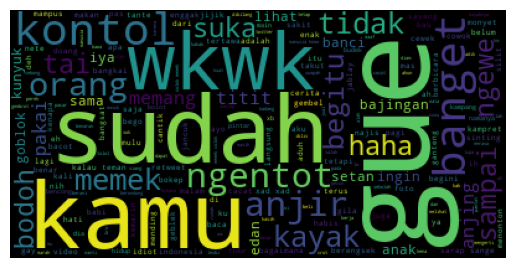

In [84]:
text = ' '.join(df_data['Tweet_Normalisasi_Alay'][df_data.label=="Abusive"])
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

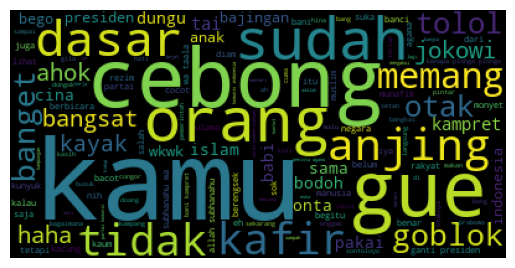

In [85]:
text = ' '.join(df_data['Tweet_Normalisasi_Alay'][df_data.label=="Hate Speech & Abusive"])
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

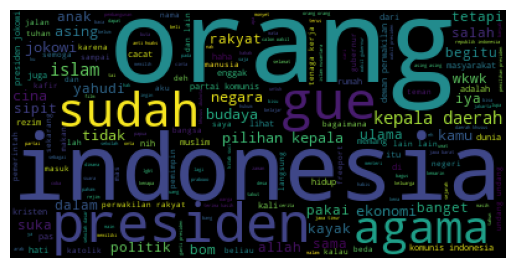

In [87]:
text = ' '.join(df_data['Tweet_Normalisasi_Alay'][df_data.label=="Neutral"])
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Bivariate

## Korelasi

In [88]:
df_data[["Total_Char", "Total_Word"]].corr()

,Total_Char,Total_Word
Total_Char,1.000000,0.978579
Total_Word,0.978579,1.000000


<Axes: xlabel='Total_Word', ylabel='Total_Char'>

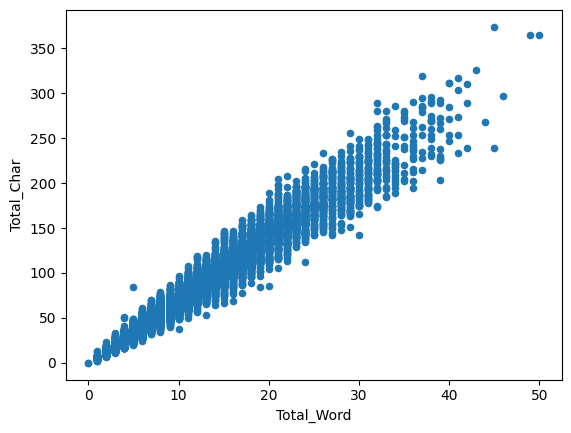

In [89]:
df_data.plot(x="Total_Word", y="Total_Char", kind="scatter")